<a href="https://colab.research.google.com/github/Hyuk-Jung-Newbie/individual-repoting_JH/blob/main/%EA%B0%9C%EC%9D%B8%EA%B3%BC%EC%A0%9C_%ED%95%9C%EC%8B%9D%EB%B6%84%EB%A5%98_%EC%A0%95%ED%98%81_v0_55_0903_60**__CNN_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
cd/content/drive/MyDrive/KU_LGCNS21/K-FOOD

/content/drive/MyDrive/KU_LGCNS21/K-FOOD


In [ ]:
pip install imageio

In [60]:
import tensorflow as tf
import numpy as np
from skimage import io
from skimage.transform import rescale,resize,downscale_local_mean
import cv2
import os
import PIL
from PIL import Image
import tensorflow_datasets as tfds
from google.colab.patches import cv2_imshow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from google.colab import drive
from imageio import imread
%matplotlib inline  
print ("Package loaded") 
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) )

Package loaded
Current folder is /content/drive/My Drive/KU_LGCNS21/K-FOOD


In [ ]:
# Training set folder 

paths = {"12.Gatkimchi","29.Kimchi fried rice","30.Kimchi pancake","31.Kimchi stew","32.Braised Kimchi","39.Nabak Kimchi",
         "50.tofu kimchi","70.cabbage kimchi","71.White kimchi","73.Chive Kimchi","104.young radish kimchi","128.radish kimchi","136.Green onion kimchi"}
         
# The reshape size
imgsize = [100, 100]
# Grayscale
use_gray = 1
# Save name
data_name = "custom_data"

print ("Your images should be at")
for i, path in enumerate(paths):
    print (" [%d/%d] %s/%s" % (i, len(paths), cwd, path)) 

print ("Data will be saved to %s" 
       % (cwd + '/data/' + data_name + '.npz'))

Your images should be at
 [0/13] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/30.Kimchi pancake
 [1/13] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/71.White kimchi
 [2/13] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/73.Chive Kimchi
 [3/13] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/136.Green onion kimchi
 [4/13] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/29.Kimchi fried rice
 [5/13] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/39.Nabak Kimchi
 [6/13] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/104.young radish kimchi
 [7/13] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/128.radish kimchi
 [8/13] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/32.Braised Kimchi
 [9/13] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/70.cabbage kimchi
 [10/13] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/31.Kimchi stew
 [11/13] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/12.Gatkimchi
 [12/13] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/50.tofu kimchi
Data will be saved to /content/drive/MyDrive/KU_LGCNS21/K-FOOD/data/custom_data.npz


In [ ]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        # print ("Current Image if GRAY!")
        return rgb

In [ ]:
nclass     = len(paths)
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]
imgcnt     = 0
for i, relpath in zip(range(nclass), paths):
    path = cwd + "/" + relpath
    flist = sorted(os.listdir(path))
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)        
        ## open cv 이용
        try:
          currimg=cv2.imread(fullpath, cv2.IMREAD_GRAYSCALE)
          currimg_small=cv2.resize(currimg, (100, 100))
        except Exception as e:
          print(str(e))
          continue      
        currimgvec   = np.reshape(currimg_small, (1, -1))
        # Save 
        curr_label = np.eye(nclass, nclass)[i:i+1, :]
        if imgcnt is 0:
            totalimg   = currimgvec
            totallabel = curr_label
        else:
            totalimg   = np.concatenate((totalimg, currimgvec), axis=0)
            totallabel = np.concatenate((totallabel, curr_label), axis=0)
        imgcnt    = imgcnt + 1
print ("Total %d images loaded." % (imgcnt))

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion faile

DIVIDE TOTAL DATA INTO TRAINING AND TEST SET

In [ ]:
def print_shape(string, x):
    print ("Shape of '%s' is %s" % (string, x.shape,))
    
randidx    = np.random.randint(imgcnt, size=imgcnt)
trainidx   = randidx[0:int(4*imgcnt/5)]
testidx    = randidx[int(4*imgcnt/5):imgcnt]
trainimg   = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg    = totalimg[testidx, :]
testlabel  = totallabel[testidx, :]
print_shape("trainimg", trainimg)
print_shape("trainlabel", trainlabel)
print_shape("testimg", testimg)
print_shape("testlabel", testlabel)

Shape of 'trainimg' is (4027, 10000)
Shape of 'trainlabel' is (4027, 13)
Shape of 'testimg' is (1007, 10000)
Shape of 'testlabel' is (1007, 13)


SAVE TO NPZ

In [ ]:
# The reshape size를 [100,100]으로 변형
imgsize = [100, 100]

savepath = cwd + "/data/" + data_name + ".npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel, testimg=testimg, testlabel=testlabel, imgsize=imgsize, use_gray=use_gray)
print ("Saved to %s" % (savepath))

Saved to /content/drive/MyDrive/KU_LGCNS21/K-FOOD/data/custom_data.npz


LOAD TO CHECK!

In [ ]:
# Load them!
cwd = os.getcwd()
loadpath = cwd + "/data/" + data_name + ".npz"
l = np.load(loadpath,allow_pickle=True) ##allow_pickle = true 추가
1
# See what's in here
l.files

# Parse data
trainimg_loaded = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded = l['testimg']
testlabel_loaded = l['testlabel']

print ("%d train images loaded" % (trainimg_loaded.shape[0]))
print ("%d test images loaded" % (testimg_loaded.shape[0]))
print ("Loaded from to %s" % (savepath))

4027 train images loaded
1007 test images loaded
Loaded from to /content/drive/MyDrive/KU_LGCNS21/K-FOOD/data/custom_data.npz


PLOT RANDOMLY SELECTED TRAIN IMAGES

In [ ]:
print(trainimg_loaded.shape)

(4027, 10000)


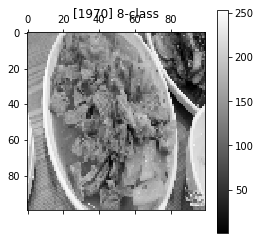

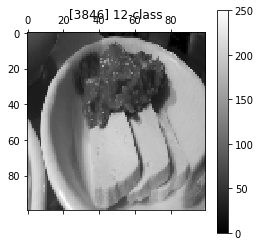

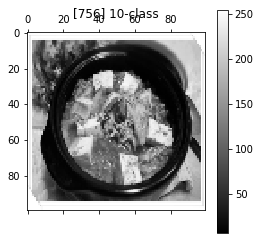

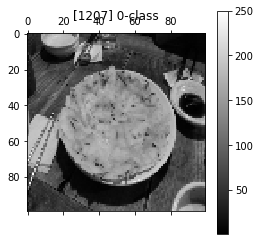

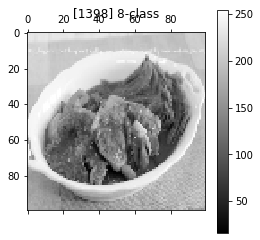

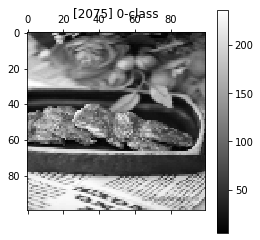

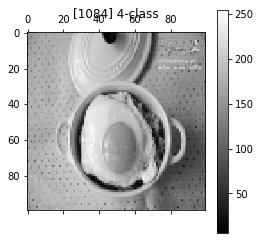

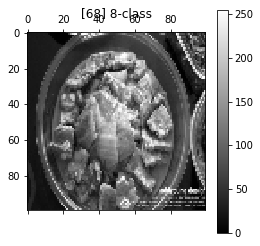

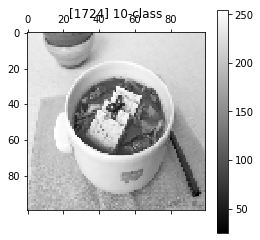

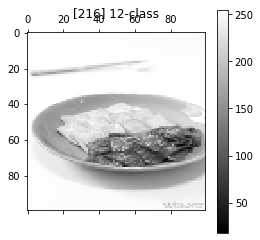

In [ ]:
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 10;
randidx = np.random.randint(ntrain_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(trainimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    if use_gray:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()

PLOT RANDOMLY SELECTED TEST IMAGES

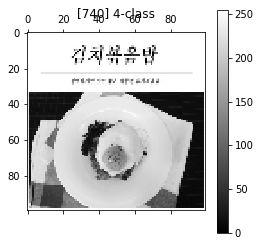

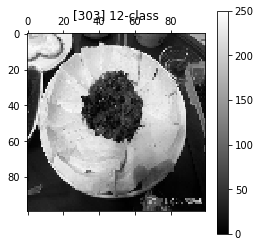

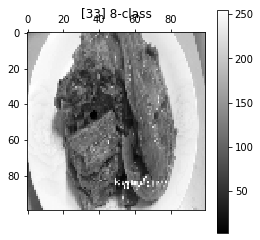

In [ ]:
# Do batch stuff using loaded data 
ntest_loaded = testimg_loaded.shape[0]
batch_size   = 3;
randidx      = np.random.randint(ntest_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(testimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = testlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    
    if use_gray:
        currimg = np.reshape(testimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(testimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()

CONVOLUTIONAL NEURAL NETWORK WITH CUSTOM DATA

In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline  
print ("Packages loaded")

Packages loaded


LOAD DATA for CONVOLUTIONAL NEURAL NETWORK 

In [4]:
# Load them!
cwd = os.getcwd()
loadpath = cwd + "/data/custom_data.npz"
l = np.load(loadpath)

# See what's in here
print (l.files)

# Parse data
trainimg = l['trainimg']
trainlabel = l['trainlabel']
testimg = l['testimg']
testlabel = l['testlabel']
imgsize = l['imgsize']
use_gray = l['use_gray']
ntrain = trainimg.shape[0]
nclass = trainlabel.shape[1]
dim    = trainimg.shape[1]
ntest  = testimg.shape[0]
print ("%d train images loaded" % (ntrain))
print ("%d test images loaded" % (ntest))
print ("%d dimensional input" % (dim))
print ("Image size is %s" % (imgsize))
print ("%d classes" % (nclass))

['trainimg', 'trainlabel', 'testimg', 'testlabel', 'imgsize', 'use_gray']
4027 train images loaded
1007 test images loaded
10000 dimensional input
Image size is [100 100]
13 classes


In [5]:
print(trainimg.shape, trainlabel.shape)

(4027, 10000) (4027, 13)


In [6]:
print(testimg.shape, testlabel.shape)

(1007, 10000) (1007, 13)


In [7]:
from sklearn.model_selection import train_test_split
trainimg_scaled = trainimg/255.0
trainimg_scaled = trainimg.reshape(-1,100,100,1)
trainimg_scaled,valimg_scaled,trainlabel,vallabel = train_test_split(trainimg_scaled,trainlabel,test_size=0.2,random_state = 2021)

합성곱 신경망 만들기

In [117]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape = (100,100,1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same',input_shape = (100,100,1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(13,activation='softmax'))

In [118]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               4000100   
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)              

모델컴파일&학습

In [119]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-kfood.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(trainimg_scaled,trainlabel,epochs=20,validation_data=(valimg_scaled,vallabel),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
101/101 [==============================] - 49s 478ms/step - loss: 24.3923 - accuracy: 0.1822 - val_loss: 1.8259 - val_accuracy: 0.2258
Epoch 2/20
101/101 [==============================] - 47s 467ms/step - loss: 2.0546 - accuracy: 0.2037 - val_loss: 1.6808 - val_accuracy: 0.2035
Epoch 3/20
101/101 [==============================] - 48s 474ms/step - loss: 2.0260 - accuracy: 0.2024 - val_loss: 1.6783 - val_accuracy: 0.2047
Epoch 4/20
101/101 [==============================] - 48s 472ms/step - loss: 1.9694 - accuracy: 0.2043 - val_loss: 1.6598 - val_accuracy: 0.2072
Epoch 5/20
101/101 [==============================] - 48s 477ms/step - loss: 1.9381 - accuracy: 0.2058 - val_loss: 1.7249 - val_accuracy: 0.2333
Epoch 6/20
101/101 [==============================] - 48s 475ms/step - loss: 1.9077 - accuracy: 0.2009 - val_loss: 1.6872 - val_accuracy: 0.2184
Epoch 7/20
101/101 [==============================] - 49s 484ms/step - loss: 1.8648 - accuracy: 0.2108 - val_loss: 1.6576 - val_a

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(valimg_scaled,vallabel)

김치 이미지 분류 적용


In [180]:
#학습된 모델 로드

model2 = keras.models.load_model('/content/drive/MyDrive/KU_LGCNS21/K-FOOD/best-cnn-kfood.h5')

In [181]:
#분류할 이미지의 경로
img_source = '/content/drive/MyDrive/KU_LGCNS21/K-FOOD/PoC/104.young radish kimchi/104.young radish kimchi_PoC.jpg'   #입력할 이미지 경로

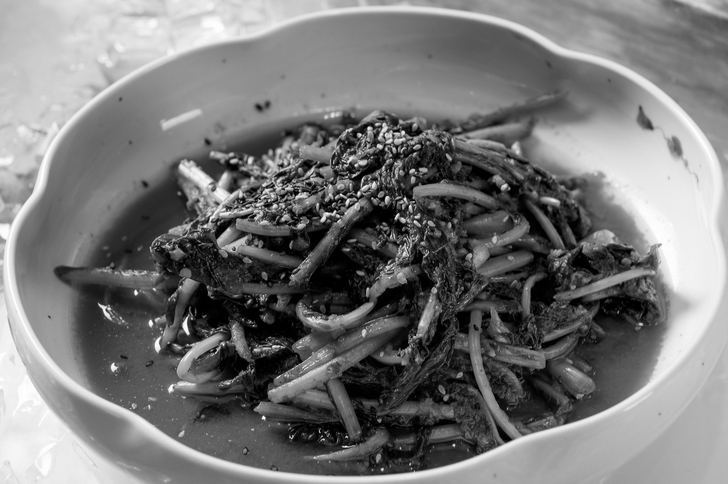

In [182]:
image_usage = cv2.imread(img_source, cv2.IMREAD_GRAYSCALE)
cv2_imshow(image_usage)
cv2.waitKey()
cv2.destroyAllWindows()

In [191]:
image_usage.shape
image_usage_small=cv2.resize(image_usage, (100, 100))

In [194]:
# #이미지를 모델이 예측 가능하도록 가공
# x = keras.preprocessing.image.load_img(img_source, target_size=(100,100))

# x_array = keras.preprocessing.image.img_to_array(x)

# x_array.shape

image_usage_small = image_usage_small.reshape(-1,100,100,1)
image_usage_small.shape


# trainimg_scaled = trainimg.reshape(-1,100,100,1)

# image = tf.keras.preprocessing.image.load_img(image_path)
# input_arr = keras.preprocessing.image.img_to_array(image)
# input_arr = np.array([input_arr])  # 단일 이미지를 배치로 변환합니다.
# predictions = model.predict(input_arr)

(1, 100, 100, 1)

In [195]:
#예측
result = model2.predict(image_usage_small)

In [196]:
print(result)

[[0.22560287 0.00149075 0.00171513 0.00157363 0.16232151 0.00106851
  0.00191105 0.0011278  0.21730131 0.00469284 0.14321296 0.00306448
  0.23491716]]


In [197]:
# 클래스 확인
np.argmax(result[0])

12

In [154]:
#목록 클래스 라벨화 후 정렬
label_names = sorted(validation_generator.class_indices.items(), key=lambda pair:pair[1])
label_names = np.array([key.title() for key, value in label_names])
label_names

#결과값을 음식으로 맵핑시켜 초기화
result_label = label_names[np.argmax(result)]

print(result_labels)

result_img = keras.preprocessing.image.array_to_img(x1)

plt.imshow(result_img)

NameError: ignored